In [1]:
import qiskit

In [2]:
qiskit.__version__

'1.1.0'

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
# ibm 양자 시스템 접속
service = QiskitRuntimeService(
    channel='ibm_quantum',
    token='' # API token
)

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *

In [5]:
# 3-qubit GHZ 회로
circ = QuantumCircuit(3) # 3 큐빗짜리 회로 생성, 큐빗은 basis state 0인 상태
circ.h(0) # 0번째 게이트에 아다마르 게이트 추가
circ.cx(0,1) # CNOT 게이트를 q0, q1에 추가, q0가 컨트롤 큐빗
circ.cx(0,2) # CNOT 게이트를 q0, q2에 추가, q0가 컨트롤 큐빗

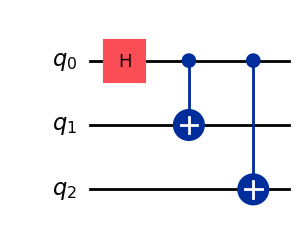

In [6]:
# Visualizing the circuit
circ.draw('mpl')
# circ.draw(output='latex')

In [7]:
from qiskit_aer import Aer # 시뮬레이션을 하기 위한 패키지

In [8]:
# 양자 회로를 벡엔드로 전송하기
backend = Aer.get_backend('statevector_simulator')

In [9]:
job = backend.run(circ) # Compile and Run
result = job.result()

In [10]:
# 시뮬레이션 결과 확인하기 
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


In [11]:
from qiskit.visualization import array_to_latex
array_to_latex(outputstate)

<IPython.core.display.Latex object>

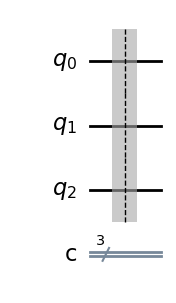

In [12]:
# 회로 관측하기
# circ.measure_all() 모든 큐빗을 관측

# 관측을 하는 회로 만들기
meas = QuantumCircuit(3, 3) # 3비트를 저장할 수 있는 output register 생성
meas.barrier(range(3)) 
meas.draw('mpl')

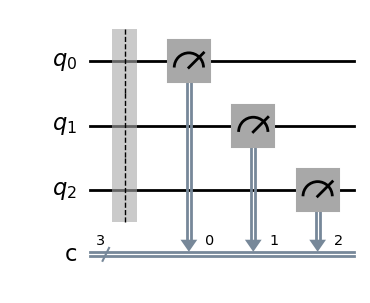

In [13]:
meas.measure(range(3), range(3))
# meas.measure(0, 0)
# meas.measure(1, 1)
# meas.measure(2, 2)
meas.draw('mpl')

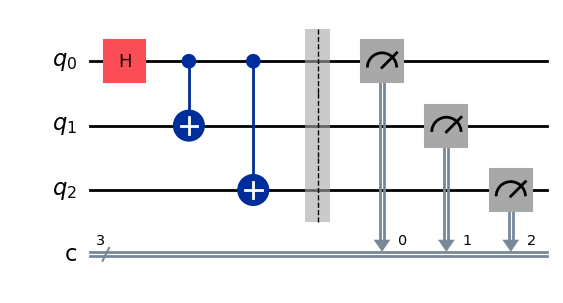

In [14]:
# circ + meas 회로 더하기
# 둘의 회로 구조가 다르므로 circ에 output register 추가
circ.add_register(meas.cregs[0]) 
qc = circ.compose(meas) # 회로 합성
qc.draw('mpl')

In [15]:
# qasm_simulator 사용해보기
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)
result_sim = job_sim.result()

In [16]:
counts = result_sim.get_counts(qc)
print(counts) 

{'000': 512, '111': 512}


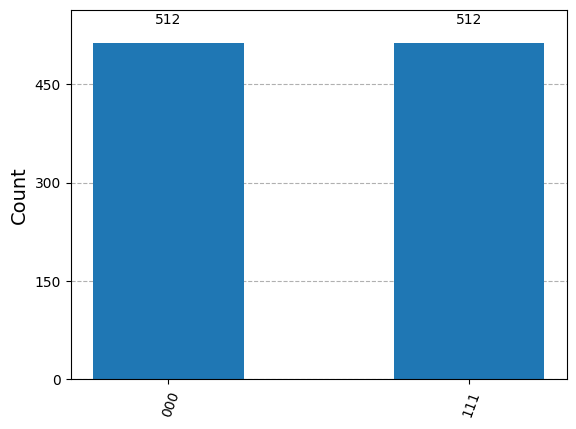

In [17]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [18]:
# 회로에 대한 정보 출력
for index, instruction in enumerate(circ.data):
    print(index, instruction.operation.name, [circ.find_bit(q).index for q in instruction.qubits])


0 h [0]
1 cx [0, 1]
2 cx [0, 2]


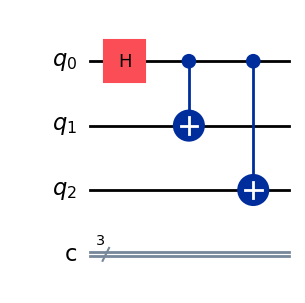

In [19]:
circ.draw('mpl')

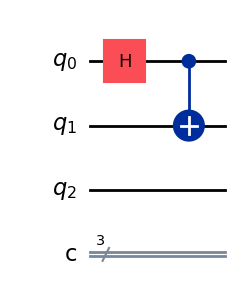

In [20]:
# 게이트 삭제
del circ.data[2]
circ.draw('mpl')

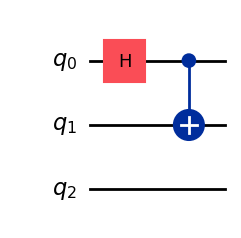

In [30]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')

In [36]:
qc.qubits.pop(2)
qc.draw('mpl')

[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1)), clbits=())]

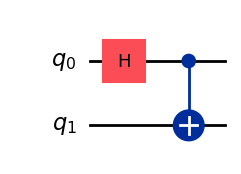

In [29]:
# 게이트 개수를 세는 함수
def count_gates(qc: QuantumCircuit):
    gate_count = {qubit: 0 for qubit in qc.qubits}
    for gate in qc.data:
        for qubit in gate.qubits:
            gate_count[qubit] += 1
    return gate_count

# 사용하지 않는 큐빗 제거 함수
def remove_unused_wires(qc: QuantumCircuit):
    gate_count = count_gates(qc)
    for qubit, count in gate_count.items():
        if count==0:
            qc.qubits.remove(qubit)
    return qc

remove_unused_wires(qc).draw('mpl')